In [1]:
%matplotlib inline
import os, sys
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import xmitgcm as xm
from netCDF4 import Dataset
from xmitgcm import llcreader
import fsspec
from datetime import datetime
from datetime import timedelta
import pandas as pd
from os import path
from glob import glob

In [5]:
# to play around

datelist = pd.date_range(datetime(2011,9,13,0), periods=416).tolist()
data_out = "/home/sypmauu/GalapagosProject/data/LLC4230_Galapagos/"
time_reference = datetime(2011,9,10,0)
delta_t = 25

day=0
# start loop through days here
DayStr = datelist[day].strftime("%d")
MonthStr = datelist[day].strftime("%m")
YearStr = datelist[day].strftime("%Y")
fname = data_out + "LLC4320_Galapagos_" + YearStr + MonthStr + DayStr + ".nc"

start_index = (datelist[day]-time_reference).total_seconds()/delta_t
end_index = (datelist[day+1]-time_reference).total_seconds()/delta_t

model = llcreader.ECCOPortalLLC4320Model()
ds = model.get_dataset(varnames=['U','V'], iter_start=start_index, iter_stop=end_index, k_levels=[0], read_grid = True)

hour = 0
time_index = start_index*delta_t + hour*3600

86400.0


### LLC4320 model output

stored at: https://data.nas.nasa.gov/ecco/data.php?dir=/eccodata/llc_4320

available every hour from 2011-9-13 00:00:00 (i=10368)- 2012-11-02 15:00:00 (i=1450224)

Time indexing follows MITgcm set-up, so depends on timestepping used for simulation and reference time (2011-09-10).

Common errors:
- AssertionError -> commonly occurs when server is down or data temporarily unavailable

In [2]:
# produce iter to point to correct time file
time_data = datetime(2011,11,2,15) #year, month, day, hour
delta_t = 25
time_reference = datetime(2011,9,10,0)
time_index = (time_data-time_reference).total_seconds()/delta_t

### LLCreader

Documentation at: https://xmitgcm.readthedocs.io/en/latest/llcreader.html

Specify using model.get_dataset() to which part of dataset to point

Useful:
- ds.nbytes / 1e9 to show how large
- ds.U.isel to select a specific part of the dataset


In [5]:
#plot galapagos region

model = llcreader.ECCOPortalLLC4320Model()
ds = model.get_dataset(varnames=['U','V'], iter_start=time_index, iter_stop=time_index+1, k_levels=[0], read_grid = True)
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 1, k_l: 1, k_p1: 2, k_u: 1, time: 1)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0
  * k_u      (k_u) int64 0
  * k_l      (k_l) int64 0
  * k_p1     (k_p1) int64 0 1
    niter    (time) float64 ...
  * time     (time) datetime64[ns] 2011-11-02T15:00:00
    CS       (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    SN       (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    Depth    (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    drC      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (k) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    dxC      (face, j, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dxF      (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dxG      (face, j_g, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dyC      (face, j_g, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dyF      (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dyG      (face, j, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    hFacC    (k, face, j, i) float32 dask.array<chunksize=(1, 3, 4320, 4320), meta=np.ndarray>
    hFacS    (k, face, j_g, i) float32 dask.array<chunksize=(1, 3, 4320, 4320), meta=np.ndarray>
    hFacW    (k, face, j, i_g) float32 dask.array<chunksize=(1, 3, 4320, 4320), meta=np.ndarray>
    PHrefC   (k) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF   (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rA       (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    rAs      (face, j_g, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    rAw      (face, j, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    Z        (k) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zp1      (k_p1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    rhoRef   (k) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    XC       (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    YC       (face, j, i) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    rAz      (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    XG       (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    YG       (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dxV      (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dyU      (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    Zl       (k_l) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zu       (k_u) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    U        (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>
    V        (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>

### Galapagos Domain

Galapagos Domain resides on tile #11 :

<img src="https://ecco-v4-python-tutorial.readthedocs.io/_images/llc90_0.png">](https://ecco-v4-python-tutorial.readthedocs.io/fields.html#tile-native-lat-lon-cap-90-grid)

### Get slice of surface velocity data

Note that U=V and V=U and matrices need to be rotated 90d

In addition:
- U and V have coordinates i, i_g, j & j_g 
- for Parcels we would prefer coordinates U(time,YC,XG) & V(time,YG,XC)???

In [4]:
V_galapagos = ds.U.isel(time=0, k=0, face=11, i_g=slice(0,1500,1), j=slice(1000,2500,1))
U_galapagos = ds.V.isel(time=0, k=0, face=11, i=slice(0,1500,1), j_g=slice(1000,2500,1))
print(U_galapagos)

<xarray.DataArray 'V' (j_g: 1500, i: 1500)>
dask.array<getitem, shape=(1500, 1500), dtype=float32, chunksize=(1500, 1500), chunktype=numpy.ndarray>
Coordinates:
    face     int64 11
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499
  * j_g      (j_g) int64 1000 1001 1002 1003 1004 ... 2495 2496 2497 2498 2499
    k        int64 0
    niter    float64 ...
    time     datetime64[ns] 2011-11-02T15:00:00
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1500, 1500), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1500, 1500), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(1500, 1500), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(1500, 1500), meta=np.ndarray>
    Z        float32 dask.array<chunksize=(), meta=np.ndarray>
    rhoRef   float32 dask.array<chunksize=(), met

In [5]:
# Get the data local
U = np.array(U_galapagos[:,:])
V = np.array(V_galapagos[:,:])

In [6]:
# make a new dataset to save to Netcdf
UU = np.expand_dims(np.rot90(U),axis=0)
VV = np.expand_dims(np.rot90(V),axis=0)
times = np.expand_dims(time_index*delta_t,axis=0)

dsU = xr.DataArray(UU,dims=['time','YG','XC'],name="UVEL")
dsU.attrs['standard_name']='Uvel'
dsU.attrs['long_name']='Zonal Component of Velocity (m/s)'
dsU.attrs['units']='m/s'
dsU.attrs['mate']='VVEL'

dsV = xr.DataArray(VV,dims=['time','YC','XG'],name="VVEL")
dsV.attrs['standard_name']='Uvel'
dsV.attrs['long_name']='Meridional Component of Velocity (m/s)'
dsV.attrs['units']='m/s'
dsV.attrs['mate']='UVEL'

dsT = xr.DataArray(times,dims='time',name='time')
dsT.attrs['units']='seconds since 2011-09-10T00:00:00'
dsT.attrs['time_origin']='2011-09-10 00:00:00'
dsT.attrs['calendar']='gregorian'
dsT.attrs['axis']='T'

ds_new = xr.merge([dsU,dsV])
ds_new.coords['time']=dsT #How to add attributes to time to specify units: seconds since 2011-09-10T00:00:00?
ds_new

<xarray.Dataset>
Dimensions:  (XC: 1500, XG: 1500, YC: 1500, YG: 1500, time: 1)
Coordinates:
  * time     (time) float64 4.633e+06
Dimensions without coordinates: XC, XG, YC, YG
Data variables:
    UVEL     (time, YG, XC) float32 -0.26559848 -0.25464475 ... -0.60961145
    VVEL     (time, YC, XG) float32 -0.09570743 -0.071024515 ... -0.22426306

In [7]:
#save as netcdf
temp_filename = './tryout_grid.nc'
ds_new.to_netcdf(path=temp_filename)
print('finished saving')

finished saving


### Save grid of LLC4320

Check whether we should also change (switch and rotate?) the XC, YC, XG & YG coordinates

In [12]:
i_galapagos = ds.XC.isel(face=11, j=slice(1000,2500,1), i=slice(0,1500,1))
i = np.array(i_galapagos[:])
ig_galapagos = ds.XG.isel(face=11, j_g=slice(1000,2500,1), i_g=slice(0,1500,1))
ig = np.array(ig_galapagos[:,:])
j_galapagos = ds.YC.isel(face=11, j=slice(1000,2500,1), i=slice(0,1500,1))
j = np.array(j_galapagos[:,:])
jg_galapagos = ds.YG.isel(face=11, j_g=slice(1000,2500,1), i_g=slice(0,1500,1))
jg = np.array(jg_galapagos[:,:])

Text(0, 0.5, 'velocity (m/s)')

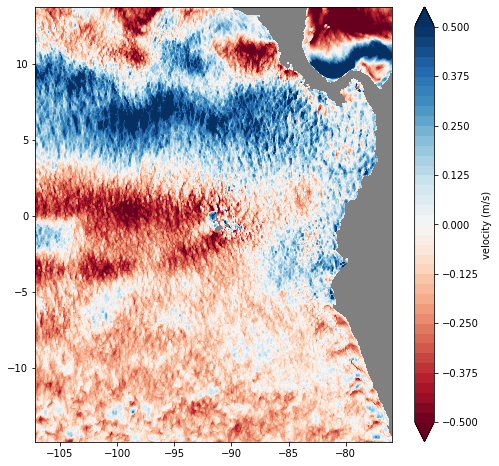

In [21]:
#check with plot

figsize=(8,8)
fig, ax = plt.subplots(figsize=figsize)

levels = np.linspace(-0.5, 0.5, 41)
fig = ax.contourf(np.rot90(i),np.rot90(jg),np.squeeze(UU,axis=0),       
                levels = levels,    
                cmap='RdBu',       
                extend='both',      
                origin='lower')     
ax.set_facecolor('gray')
cbar = plt.colorbar(fig, ax=ax)
cbar.ax.set_ylabel('velocity (m/s)')

In [16]:
# make netcdf for grid

dsXC = xr.DataArray(np.rot90(i),dims=['YC','XC'],name='lonC')
dsXC.attrs['standard_name']='longitude'
dsXC.attrs['long_name']='longitude'
dsXC.attrs['units']='degrees_east'
dsXC.attrs['coordinate']='YC XC'
dsXC.attrs['axis']='X'

dsXG = xr.DataArray(np.rot90(ig),dims=['YG','XG'],name='lonG')
dsXG.attrs['standard_name']='longitude_at_f_location'
dsXG.attrs['long_name']='longitude'
dsXG.attrs['units']='degrees_east'
dsXG.attrs['coordinate']='YG XG'
dsXG.attrs['axis']='X'

dsYC = xr.DataArray(np.rot90(j),dims=['YC','XC'],name='latC')
dsYC.attrs['standard_name']='latitude'
dsYC.attrs['long_name']='latitude'
dsYC.attrs['units']='degrees_north'
dsYC.attrs['coordinate']='YC XC'
dsYC.attrs['axis']='Y'

dsYG = xr.DataArray(np.rot90(jg),dims=['YG','XG'],name='latG')
dsYG.attrs['standard_name']='latitude_at_f_location'
dsYG.attrs['long_name']='latitude'
dsYG.attrs['units']='degrees_north'
dsYG.attrs['coordinate']='YG XG'
dsYG.attrs['axis']='Y'

ds_grid = xr.merge([dsXC, dsXG, dsYC, dsYG])

temp_filename = './LLC4320_galapagosgrid.nc'
ds_grid.to_netcdf(path=temp_filename)
print('finished saving')

finished saving


## Script to loop over data and save as netcdf

In [2]:
import os, sys
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import xmitgcm as xm
from netCDF4 import Dataset
from xmitgcm import llcreader
import fsspec
from datetime import datetime
from datetime import timedelta
import pandas as pd
from os import path
from glob import glob

#number_of_run = int(sys.argv[1])
#number_of_days = 25

number_of_run = 0
number_of_days = 1

datelist = pd.date_range(datetime(2011,9,13,0), periods=416).tolist()
days_to_save = np.arange(number_of_run*number_of_days,number_of_run*number_of_days+number_of_days,1) 
data_out = "/projects/0/topios/hydrodynamic_data/LLC4320_Galapagos/hourly_output/"
time_reference = datetime(2011,9,10,0)
delta_t = 25
model = llcreader.ECCOPortalLLC4320Model()

for day in days_to_save:
    DayStr = datelist[day].strftime("%d")
    MonthStr = datelist[day].strftime("%m")
    YearStr = datelist[day].strftime("%Y")
    fname = data_out + "LLC4320_Galapagos_" + YearStr + MonthStr + DayStr + ".nc"

    start_index = (datelist[day]-time_reference).total_seconds()/delta_t
    end_index = (datelist[day+1]-time_reference).total_seconds()/delta_t
    
    ds = model.get_dataset(varnames=['U','V'], iter_start=start_index, iter_stop=end_index, k_levels=[0], read_grid = True)

    UU = np.zeros((24,1500,1500),dtype="float32")
    VV = np.zeros((24,1500,1500),dtype="float32")
    print(VV.dtype)
    times = np.zeros((24))

    for hour in range(2):
        print(hour)
        time_value = start_index*delta_t + hour*3600
        # note that U=V and V=U
        V_galapagos = ds.U.isel(time=hour, k=0, face=11, i_g=slice(0,1500,1), j=slice(1000,2500,1))
        U_galapagos = ds.V.isel(time=hour, k=0, face=11, i=slice(0,1500,1), j_g=slice(1000,2500,1))

        # Get the data local
        U = np.array(U_galapagos[:,:],dtype="float32")
        V = np.array(V_galapagos[:,:],dtype="float32")
        print(V.dtype)

        # make a new dataset to save to Netcdf
        UU[hour,:,:] = np.expand_dims(np.rot90(U),axis=0)
        VV[hour,:,:] = np.expand_dims(np.rot90(V),axis=0)
        times[hour] = np.expand_dims(time_value,axis=0)
        print(UU.dtype)

    dsU = xr.DataArray(UU,dims=['time','YG','XC'],name="UVEL")
    dsU.attrs['standard_name']='Uvel'
    dsU.attrs['long_name']='Zonal Component of Velocity (m/s)'
    dsU.attrs['units']='m/s'
    dsU.attrs['mate']='VVEL'

    dsV = xr.DataArray(VV,dims=['time','YC','XG'],name="VVEL")
    dsV.attrs['standard_name']='Uvel'
    dsV.attrs['long_name']='Meridional Component of Velocity (m/s)'
    dsV.attrs['units']='m/s'
    dsV.attrs['mate']='UVEL'

    dsT = xr.DataArray(times,dims='time',name='time')
    dsT.attrs['units']='seconds since 2011-09-10T00:00:00'
    dsT.attrs['time_origin']='2011-09-10 00:00:00'
    dsT.attrs['calendar']='gregorian'
    dsT.attrs['axis']='T'

    ds_fields = xr.merge([dsU,dsV])
    ds_fields.coords['time']=dsT 

    #save as netcdf
    ds_fields.to_netcdf(path=fname)
    print('finished saving' + fname)



float32
0
float32
float32
1
float32
float32
finished saving/projects/0/topios/hydrodynamic_data/LLC4320_Galapagos/hourly_output/LLC4320_Galapagos_20110913.nc
